<a href="https://colab.research.google.com/github/elenadigrigoli/Homework-1-Elena-di-Grigoli/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import random
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/steam-reviews-2021/steam_reviews.csv
/kaggle/input/how-to-get-32gb-ram/train_labels.parquet
/kaggle/input/how-to-get-32gb-ram/__results__.html
/kaggle/input/how-to-get-32gb-ram/train.parquet
/kaggle/input/how-to-get-32gb-ram/submission.csv
/kaggle/input/how-to-get-32gb-ram/__notebook__.ipynb
/kaggle/input/how-to-get-32gb-ram/__output__.json
/kaggle/input/how-to-get-32gb-ram/custom.css


In [ ]:
df = pd.read_csv('/kaggle/input/steam-reviews-2021/steam_reviews.csv')
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [ ]:
df.shape

(21747371, 23)

# [RQ1]

In [ ]:

# Define the number of rows you want to sample
sample_size = 500000

# Define the chunk size for reading the CSV in parts
chunk_size = 100000  # Adjust this to suit your memory capacity

# Initialize an empty list to store sampled chunks
sampled_data = []

# Read the CSV file in chunks and sample from each chunk
for chunk in pd.read_csv('/kaggle/input/steam-reviews-2021/steam_reviews.csv', chunksize=chunk_size):
    # Randomly sample from the current chunk without replacement
    chunk_sample = chunk.sample(frac=0.1, random_state=42)  # Adjust frac depending on chunk size and desired rows
    sampled_data.append(chunk_sample)

    # Check if we've accumulated enough rows
    if sum(len(sample) for sample in sampled_data) >= sample_size:
        break

# Concatenate all sampled chunks into a single DataFrame
Steam_Games = pd.concat(sampled_data)[:sample_size]  # Assign the sampled DataFrame to Steam_Games

Steam_Games.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
75721,75721,292030,The Witcher 3: Wild Hunt,73129320,german,einfach gut,1595449722,1595449722,True,0,...,True,False,False,76561198103727675,12,2,18426.0,0.0,15076.0,1.598440e+09
80184,80184,292030,The Witcher 3: Wild Hunt,72466032,brazilian,Toop demais!!!,1594424131,1594424131,True,0,...,True,False,False,76561198802799887,3,1,16556.0,0.0,10309.0,1.610076e+09
19864,19864,292030,The Witcher 3: Wild Hunt,82237091,english,Overrated,1607832788,1607832788,False,2,...,True,False,False,76561198060198272,52,22,89.0,0.0,89.0,1.541831e+09
76699,76699,292030,The Witcher 3: Wild Hunt,72975121,english,do it,1595203489,1595203489,True,0,...,True,False,False,76561199064738865,50,1,484.0,0.0,453.0,1.598637e+09
92991,92991,292030,The Witcher 3: Wild Hunt,70659516,schinese,以前盗版通关过，打折了入正版来二周目，真滴好玩,1591936834,1591936834,True,0,...,True,False,False,76561198157424170,46,8,3011.0,0.0,669.0,1.593148e+09


In [ ]:
# Select only numeric columns for correlation calculation
steam_numeric_data = Steam_Games.select_dtypes(include=[float, int])
correlation = steam_numeric_data.corr()

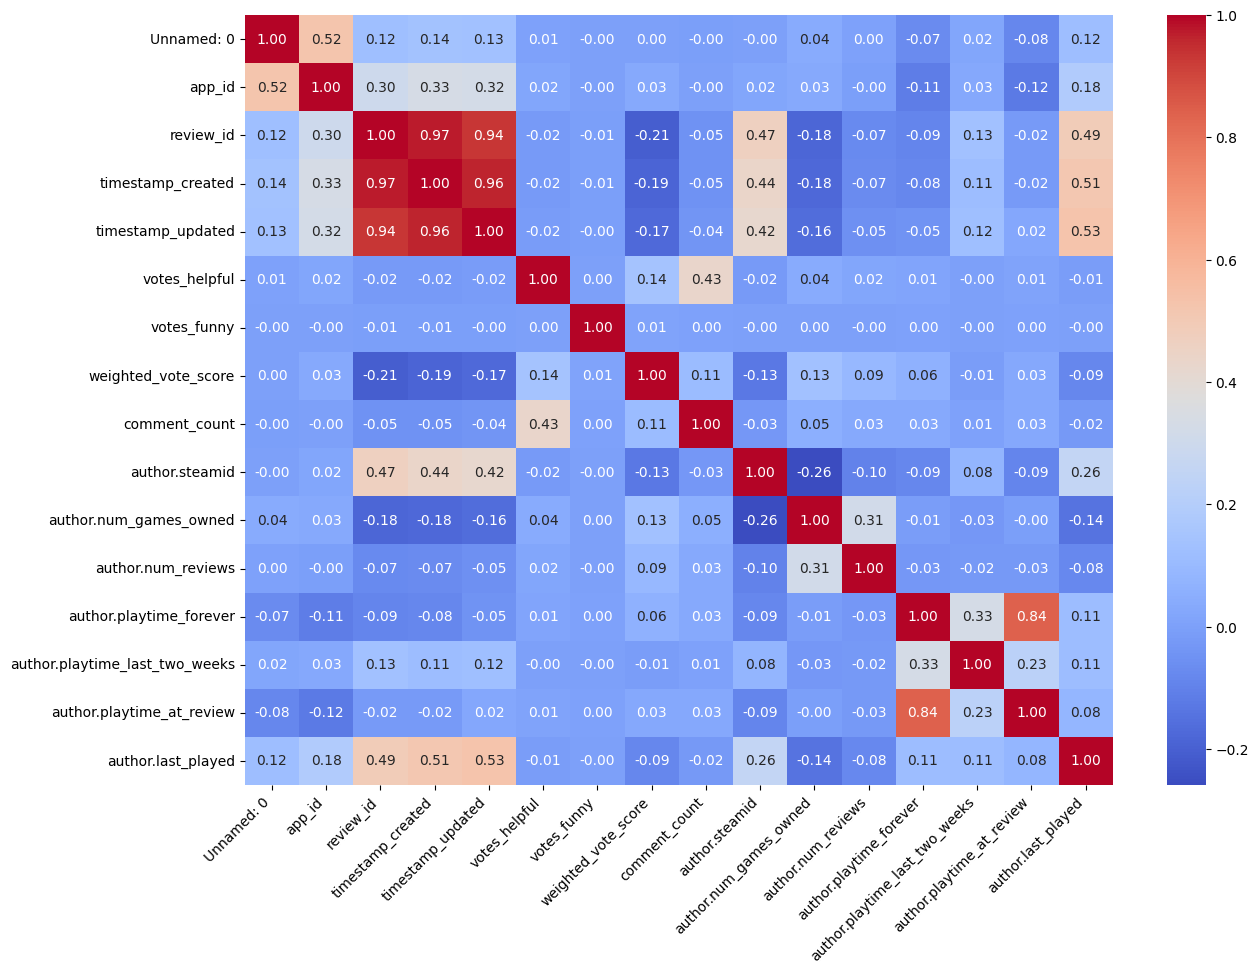

In [ ]:
plt.figure(figsize=(14, 10))

# Create the heatmap with additional formatting
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    annot=True,
    fmt=".2f",  # Limit decimal places for readability
    cmap="coolwarm",  # Use a color map that enhances contrast
    annot_kws={"size": 10}  # Set annotation font size
)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

There is a strong positive correlation between timestamp_created and timestamp_updated, which makes sense since both represent time-related information about the review.
weighted_vote_score is positively correlated with votes_helpful, meaning reviews with more helpful votes tend to have higher weighted scores.
author.num_games_owned and author.num_reviews are positively correlated, suggesting that players who own more games are also more active in leaving reviews.
playtime_forever, playtime_last_two_weeks, and playtime_at_review show strong positive correlations with each other, as expected, since they all represent different aspects of gameplay time.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

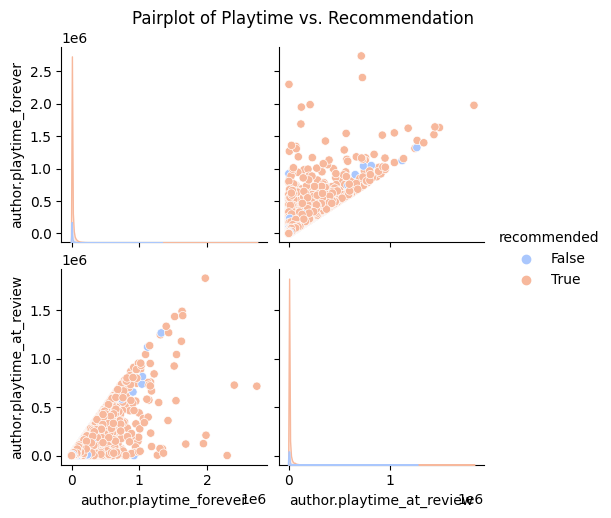

In [ ]:
# Selecting specific columns for pairplot
pairplot_data = Steam_Games[['author.playtime_forever', 'author.playtime_at_review', 'recommended']]

# Creating the pairplot
sns.pairplot(pairplot_data, hue='recommended', palette='coolwarm')
plt.suptitle("Pairplot of Playtime vs. Recommendation", y=1.02)  # Title with some spacing above
plt.show()

Players with higher playtime are more likely to recommend the game.
Players who spent minimal time on the game are less likely to recommend it, indicating that a portion of negative reviews may come from players who didn’t engage deeply.

<Figure size 1000x600 with 0 Axes>

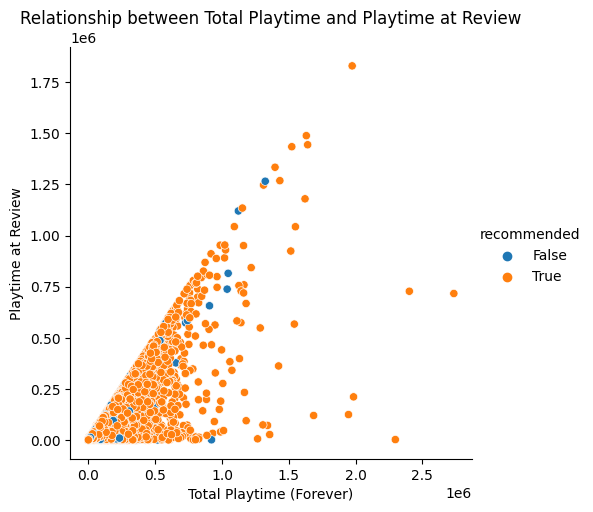

In [ ]:
# Plot the strongest positive correlation
plt.figure(figsize=(10, 6))
sns.relplot(x='author.playtime_forever', y='author.playtime_at_review', hue='recommended', data=Steam_Games)
plt.title('Relationship between Total Playtime and Playtime at Review')
plt.xlabel('Total Playtime (Forever)')
plt.ylabel('Playtime at Review')
plt.show()

Players who continue to play for extended periods tend to have positive experiences and recommend the game.
Players who don’t engage deeply are more likely to leave a negative review, possibly due to unmet expectations or lack of initial interest.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


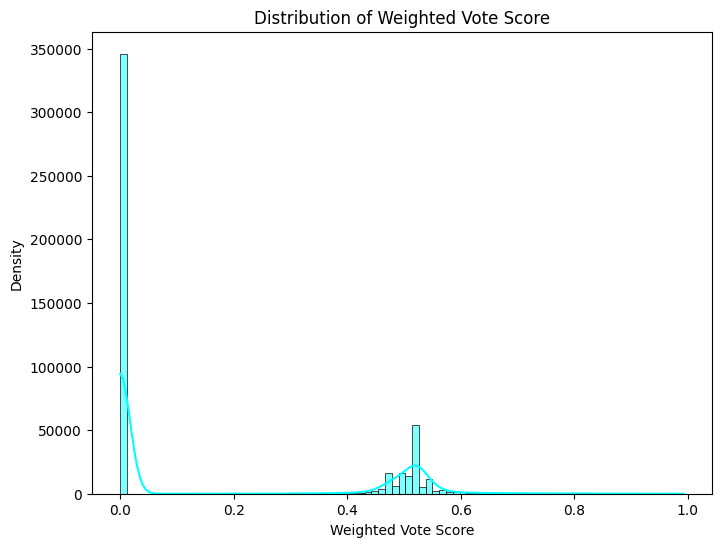

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(Steam_Games['weighted_vote_score'], kde=True, color='cyan')
plt.xlabel('Weighted Vote Score')
plt.ylabel('Density')
plt.title('Distribution of Weighted Vote Score')
plt.show()

The dataset has many low-weighted vote scores, with only a small proportion of reviews achieving moderate or high scores.
This reflects the nature of user engagement, where only a few reviews get significant positive votes or attention.

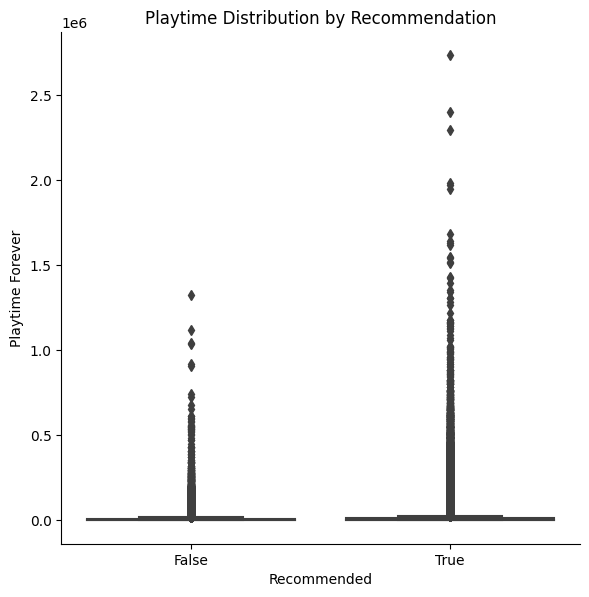

In [ ]:
# Box plot for playtime distribution based on recommendation
sns.catplot(x='recommended', y='author.playtime_forever', kind='box', data=Steam_Games, height=6, aspect=1)
plt.xlabel('Recommended')
plt.ylabel('Playtime Forever')
plt.title('Playtime Distribution by Recommendation')
plt.show()

Players who recommend the game tend to have higher playtimes, indicating a positive correlation between playtime and recommendation. This aligns with the idea that more engaged players are more likely to have a favorable view of the game.

# [RQ2]

In [ ]:
review_counts = df.groupby('app_name').size() #count number of reviews for each app
#application with the highest number of reviews
highest_reviews_app = review_counts.idxmax() #app
highest_reviews_count = review_counts.max() #number

#application with the lowest number of reviews
lowest_reviews_app = review_counts.idxmin()
lowest_reviews_count = review_counts.min()

# Display the results
print(f"Application with the highest number of reviews: {highest_reviews_app} ({highest_reviews_count} reviews)")
print(f"Application with the lowest number of reviews: {lowest_reviews_app} ({lowest_reviews_count} reviews)")

Application with the highest number of reviews: PLAYERUNKNOWN'S BATTLEGROUNDS (1644255 reviews)
Application with the lowest number of reviews: Neon Hardcorps (200 reviews)


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

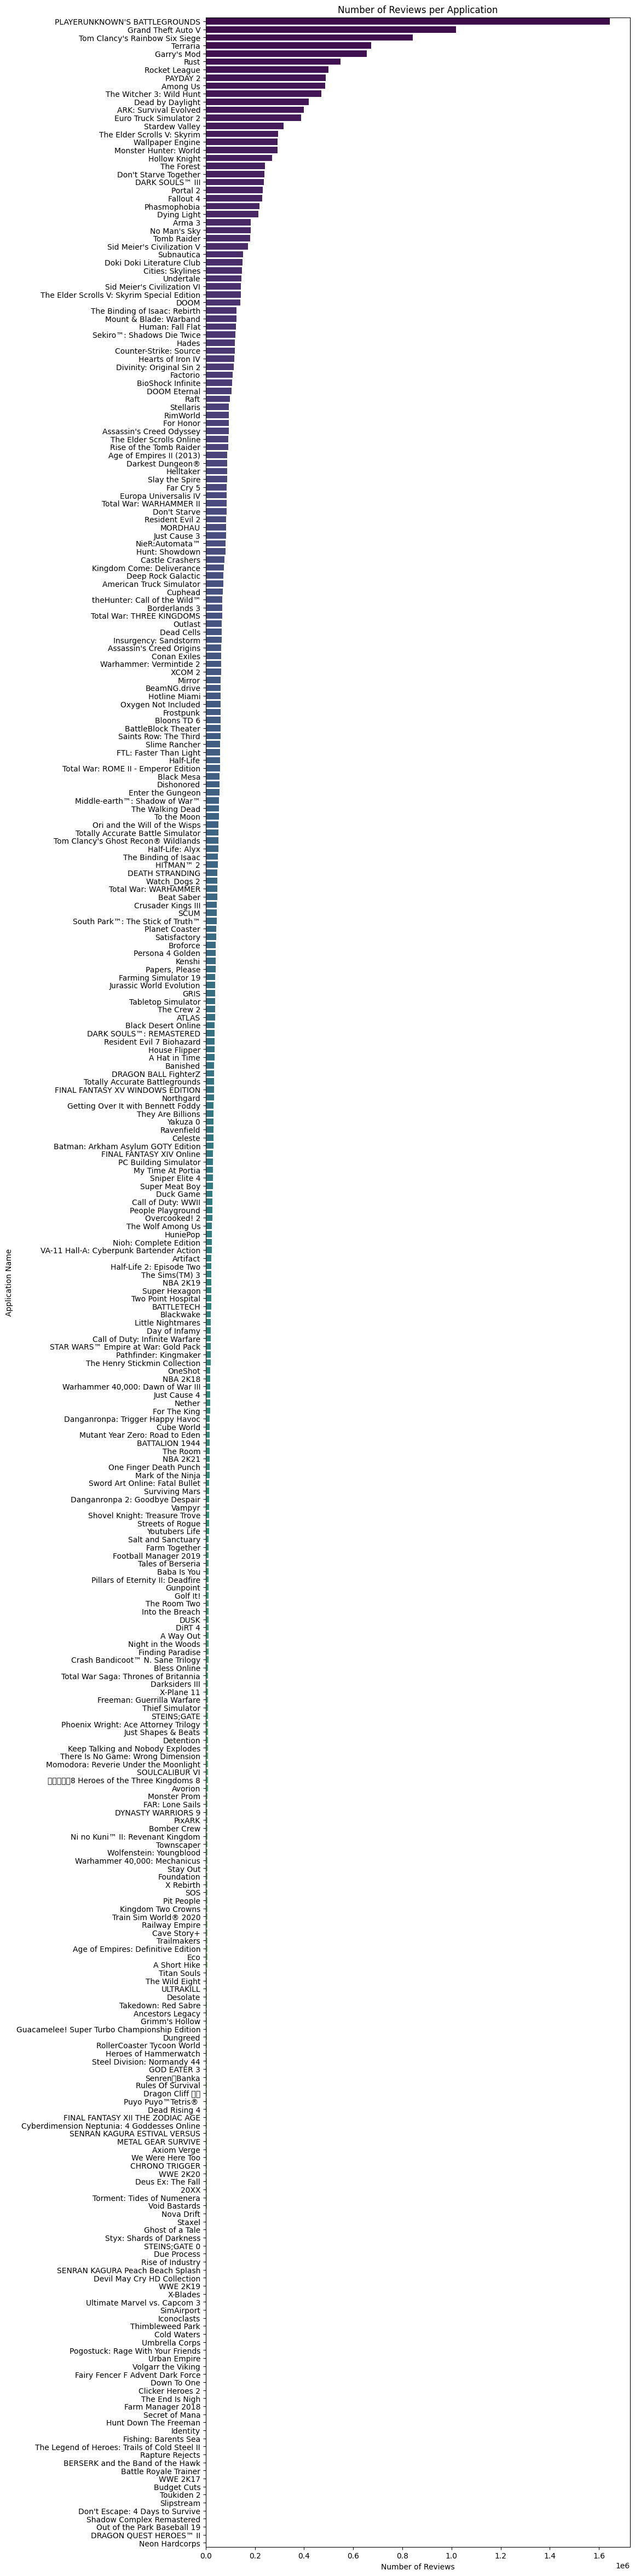

In [ ]:
review_counts = review_counts.sort_values(ascending=False) #sorting in descending orted

plt.figure(figsize=(10, 60))


sns.barplot( x=review_counts.values, y=review_counts.index, palette='viridis')

plt.title('Number of Reviews per Application')
plt.xlabel('Number of Reviews')
plt.ylabel('Application Name')
plt.show()

It is noticeble that the application with the most reviews nearly doubles the application with the second most reviews. Whereas in the rest of the graph the number of reviews decreases smoothly and uniformly.

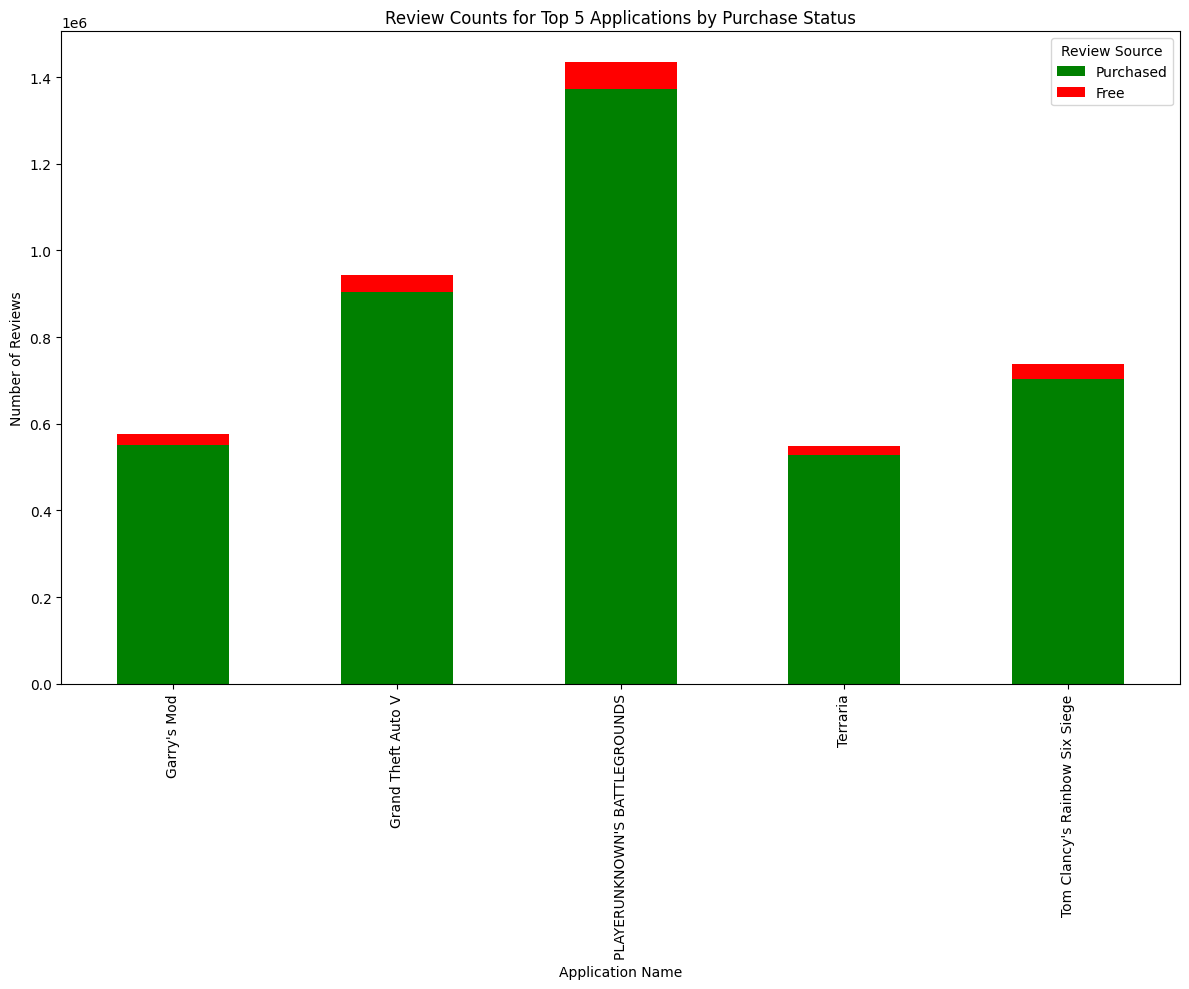

Review Counts from Users Who Purchased vs. Received for Free:
                          app_name  Purchased   Free  Purchased (%)  Free (%)
0                     Garry's Mod     551250  24765      95.700633  4.299367
1              Grand Theft Auto V     905288  38624      95.908093  4.091907
2   PLAYERUNKNOWN'S BATTLEGROUNDS    1372721  61443      95.715762  4.284238
3                        Terraria     527762  20154      96.321699  3.678301
4  Tom Clancy's Rainbow Six Siege     702505  36300      95.086660  4.913340


In [ ]:
#number of reviews for each application
review_counts = df['app_name'].value_counts()

#top 5 apps
top_5_apps = review_counts.head(5).index

# Filter the original DataFrame for the top 5 applications
top_5_reviews = df[df['app_name'].isin(top_5_apps)]

# Count reviews for each based on if the app was purchased or free.
purchase_counts = top_5_reviews.groupby(['app_name']).agg({
    'steam_purchase': 'sum',
    'received_for_free': 'sum'
}).reset_index()

# Rename the columns of the original dataset to visualize more clearly.
purchase_counts.rename(columns={'steam_purchase': 'Purchased', 'received_for_free': 'Free'}, inplace=True)

# We calculate the total and the percentages
purchase_counts['Total'] = purchase_counts['Purchased'] + purchase_counts['Free']
purchase_counts['Purchased (%)'] = (purchase_counts['Purchased'] / purchase_counts['Total']) * 100
purchase_counts['Free (%)'] = (purchase_counts['Free'] / purchase_counts['Total']) * 100


purchase_counts.set_index('app_name')[['Purchased', 'Free']].plot(kind='bar', stacked=True, figsize=(12, 10), color=['green', 'red'])


plt.title('Review Counts for Top 5 Applications by Purchase Status')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Source', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Print the review counts with percentages
print("Review Counts from Users Who Purchased vs. Received for Free:\n", purchase_counts[['app_name', 'Purchased', 'Free', 'Purchased (%)', 'Free (%)']])

For each application there is a similiar distribution between the number of users that purchased it, around 96%, and the number of users that received it for free, around 4%.

In [ ]:
recommendation_counts = df.groupby('app_name')['recommended'].sum().reset_index()


most_recommended_index = recommendation_counts['recommended'].idxmax() #app
least_recommended_index = recommendation_counts['recommended'].idxmin()#number

m_name = recommendation_counts.loc[most_recommended_index, 'app_name']
l_name = recommendation_counts.loc[least_recommended_index, 'app_name']

m_count = recommendation_counts['recommended'].max()
l_count = recommendation_counts['recommended'].min()

print(f"Most Recommended Application:\n- Name: {m_name}\n- Recommendations: {m_count}\n")
print(f"Least Recommended Application:\n- Name: {l_name}\n- Recommendations: {l_count}\n")

Most Recommended Application:
- Name: PLAYERUNKNOWN'S BATTLEGROUNDS
- Recommendations: 886417

Least Recommended Application:
- Name: Neon Hardcorps
- Recommendations: 89



If we take a moment to check the graph (2.4) that shows in descending order the number bof reviews for each application, we can observe that the most and least recommended apps correspond to the games with the highest and lowest number of reviews.

In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


(2.4) To answer this question we need first to create a variable for review scores because it does not exist in the original dataset. One possible idea we came up with is to calculate the ration between the number of positive and negative reviews for each game and then categorise them in tenths.

In [ ]:
#Calculate positive and total reviews groupping by app name
review_counts = df.groupby('app_name').agg(
    positive_reviews=('recommended', 'sum'), #Sum of recommended reviews (1s)
    total_reviews=('recommended', 'count')   # Total number of reviews (1s and 0s)
).reset_index()

#Calculate negative reviews as total minus positive reviews
review_counts['negative_reviews'] = review_counts['total_reviews'] - review_counts['positive_reviews']

#Calculate the ratio of positive to negative reviews, avoiding division by zero
review_counts['review_ratio'] = review_counts.apply(
    lambda row: row['positive_reviews'] / row['negative_reviews'] if row['negative_reviews'] > 0 else 1,
    axis=1
)

#Categorize the ratio into tenths to create the review score
review_counts['review_score'] = pd.qcut(review_counts['review_ratio'], 10, labels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

#Calculate the correlation between total recommendations and review score
from scipy.stats import pearsonr

# Assuming `review_counts['positive_reviews']` approximates the total recommendations per app
correlation, p_value = pearsonr(review_counts['positive_reviews'], review_counts['review_score'].astype(float))

print(f"Correlation: {correlation}, p-value: {p_value}")

Correlation: 0.15359449760402244, p-value: 0.0063061950106761844


By how it is built the review_score variable, it is almost tautological that there is a corrlation. Actually we was expecting a higher rate, much closer to 1 than 0.15.

# [RQ3]

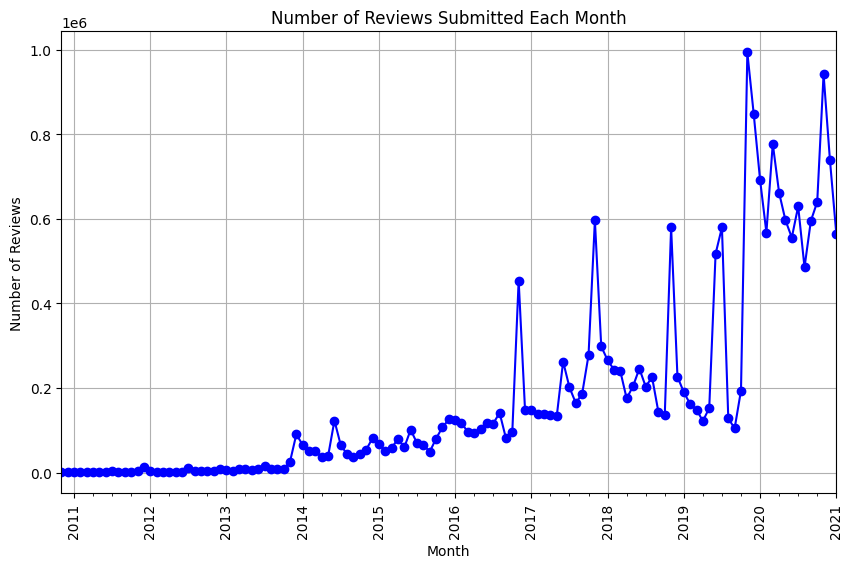

In [ ]:
import pandas as pd
#Convert to datetime format
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

df['month_year'] = df['timestamp_created'].dt.to_period('M')

#Number of reviews each Month
monthly_reviews = df.groupby('month_year').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind='line', marker='o', color='b')
plt.title('Number of Reviews Submitted Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

There's a noticeable upward trend in the number of reviews submitted over time. Starting from 2011, review submissions were relatively low and consistent, with a gradual increase through 2014. Around 2015, we see a significant rise, followed by more rapid growth and periodic peaks. There are distinct spikes in review submissions occurring intermittently, notably in 2017, 2018, 2019, and towards the end of 2020. These spikes could indicate certain events or seasonal promotions that encourage users to leave reviews. The spikes appear to show some seasonal patterns. For example, a few peak months are followed by a drop in activity, suggesting that there could be periods of higher engagement followed by periods with lower engagement.


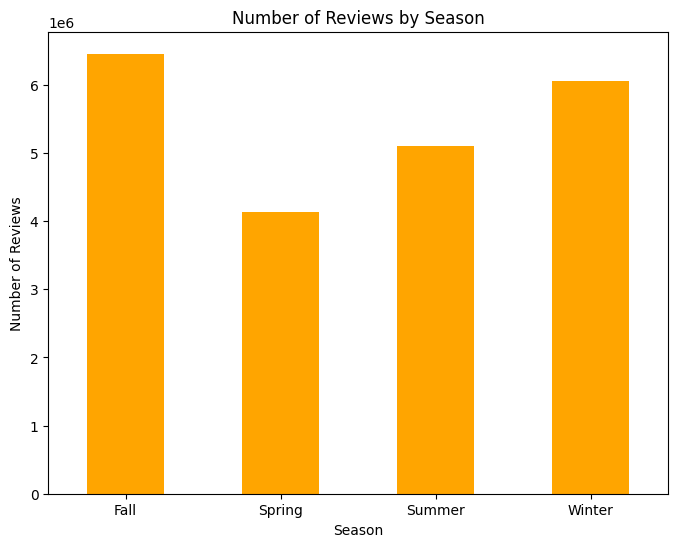

In [ ]:
#Categorize into seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp_created'].dt.month.apply(categorize_season)

# number of reviews each Season
seasonal_reviews = df.groupby('season').size()

plt.figure(figsize=(8, 6))
seasonal_reviews.plot(kind='bar', color='orange')
plt.title('Number of Reviews by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

The highest number of reviews were submitted in the Fall season, closely followed by Winter. This indicates that users tend to be more active in writing reviews during these colder months.
This pattern could be influenced by holiday shopping seasons (e.g., Black Friday, Christmas) when people make more purchases and are more likely to leave reviews.
Spring and Summer might see lower engagement because people are often more active outdoors and may have less screen time, resulting in fewer reviews.

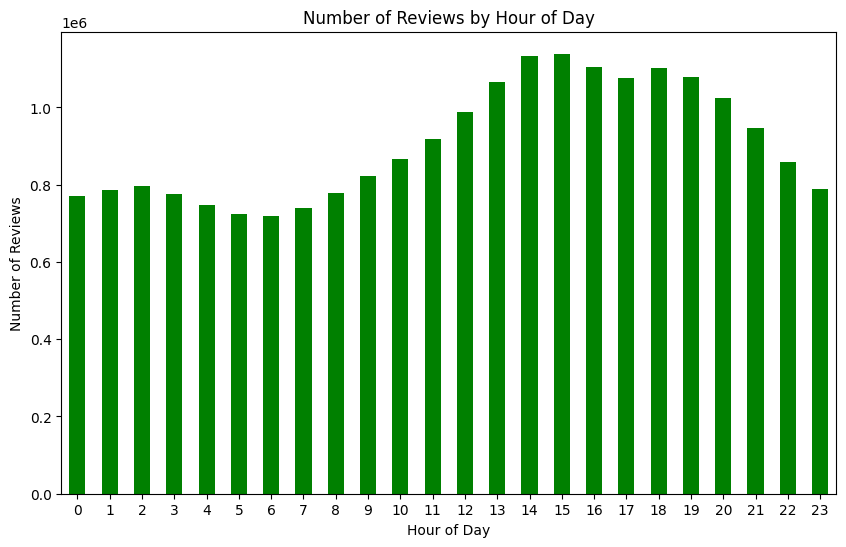

The most common time of day users write reviews is: 14:50 with 19502 occurrences.


In [ ]:
#Hour
df['hour'] = df['timestamp_created'].dt.hour

#Number of reviews per hour
hourly_reviews = df.groupby('hour').size()

#Minute
df['minute'] = df['timestamp_created'].dt.minute

# Number of reviews per hour and minute
hourly_minute_reviews = df.groupby(['hour', 'minute']).size()

plt.figure(figsize=(10, 6))
hourly_reviews.plot(kind='bar', color='green')
plt.title('Number of Reviews by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Identify the single most common review time
most_common_time = hourly_minute_reviews.idxmax()
most_common_count = hourly_minute_reviews.max()
print(f"The most common time of day users write reviews is: {most_common_time[0]}:{most_common_time[1]:02d} with {most_common_count} occurrences.")


The chart shows a gradual increase in review activity starting from around 8:00 AM, peaking in the afternoon (between 2 PM and 4 PM), and then slowly declining after 5 PM.
There is relatively stable activity across the evening hours, but the early morning hours (12:00 AM to 6:00 AM) show the lowest engagement, likely due to typical sleep schedules.

Implications for Analysis:
Peak Hours Insight: Knowing that reviews peak in the early afternoon can help target user engagement strategies. For instance, platforms could send notifications or review prompts during this peak period to maximize response rates.
Influence on Engagement Metrics: The afternoon peak suggests that users are more active post-lunch hours, possibly during breaks or downtime, which might affect engagement metrics. For example, if a promotion or event is timed around this peak, it could drive higher engagement and review volume.

<Figure size 2000x800 with 0 Axes>

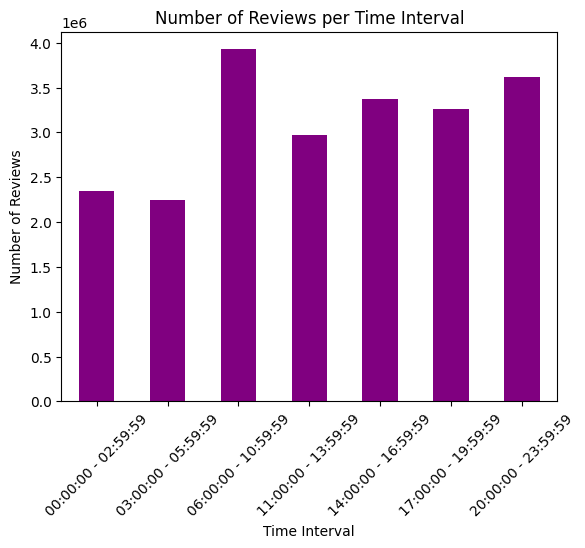

In [ ]:
def plot_reviews_by_interval(df, intervals):
    #Dtetime format
    df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
    df['time'] = df['timestamp_created'].dt.time

    interval_counts = []

    #Loop through each time interval
    for start, end in intervals:
        start_time = pd.to_datetime(start).time()
        end_time = pd.to_datetime(end).time()

        # Filter reviews
        interval_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
        interval_counts.append(len(interval_df))

    #Create a DataFrame
    interval_df = pd.DataFrame({
        'Interval': [f'{start} - {end}' for start, end in intervals],
        'Number of Reviews': interval_counts
    })

    # Plotting
    plt.figure(figsize=(20, 8))
    interval_df.set_index('Interval').plot(kind='bar', color='purple', legend=False)
    plt.title('Number of Reviews per Time Interval')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.show()

#Our intervals
intervals = [
    ('00:00:00', '02:59:59'),
    ('03:00:00', '05:59:59'),
    ('06:00:00', '10:59:59'),
    ('11:00:00', '13:59:59'),
    ('14:00:00', '16:59:59'),
    ('17:00:00', '19:59:59'),
    ('20:00:00', '23:59:59')
]

plot_reviews_by_interval(df, intervals)


# [RQ4]

In [ ]:
###Just to rembeber how we defined 'review_score'

# Step 1: Calculate positive and total reviews for each application
review_counts = df.groupby('app_name').agg(
    positive_reviews=('recommended', 'sum'),  # Sum of recommended reviews (1s)
    total_reviews=('recommended', 'count')     # Total number of reviews (1s and 0s)
).reset_index()

# Step 2: Calculate negative reviews
review_counts['negative_reviews'] = review_counts['total_reviews'] - review_counts['positive_reviews']

# Step 3: Calculate the ratio of positive to negative reviews, avoiding division by zero
review_counts['review_ratio'] = review_counts.apply(
    lambda row: row['positive_reviews'] / row['negative_reviews'] if row['negative_reviews'] > 0 else 1,
    axis=1
)

# Step 4: Define review_score
review_counts['review_score'] = (review_counts['review_ratio'] / review_counts['review_ratio'].max()) * 10

# Step 5: Merge the review score into your original DataFrame
df = df.merge(review_counts[['app_name', 'review_score']], on='app_name', how='left')

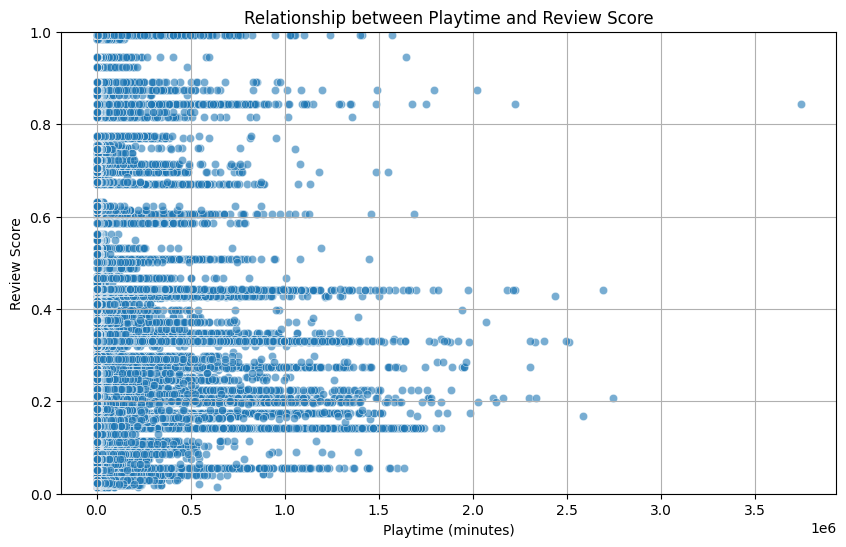

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['author.playtime_forever'],
                y=df['review_score'],
                alpha=0.6)
plt.title('Relationship between Playtime and Review Score')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Review Score')
plt.grid(True)
plt.ylim(0, 10)
plt.show()

In [ ]:
# Function to classify users based on playtime
def categorize_user_experience(playtime):
    if playtime < 20:
        return 'New User'
    elif playtime < 100:
        return 'Experienced User'
    else:
        return 'Veteran User'

# Apply the function to create a new column in the DataFrame
df['user_experience'] = df['author.playtime_forever'].apply(categorize_user_experience)

In [ ]:
# Calculate average review scores for each user experience level
average_scores = df.groupby('user_experience')['review_score'].mean().reset_index()
print(average_scores)

    user_experience  review_score
0  Experienced User      0.922466
1          New User      0.759682
2      Veteran User      0.918334


On average the review score of experienced and veteran users is similar, whereas new users tend to give lower scores to the applications. We should not focus so much on the numbers itself, because they are effected from our choice of time needed to be played to pass from a category to another. We should focus more on the clear difference of rating between new users and more experienced that underlines a trend where more experinced players tend to give higher scores. We try to suggest a couple of possible reasons why this happens:

- Beginners have more expectetions and less clue, and unmet expectations can lead to a sense of dissatisfaction towards the game which can lead to negative reviews that influence the everage score.
- Usually those who enjoy the experience tend to spend more time playing and leave favor.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

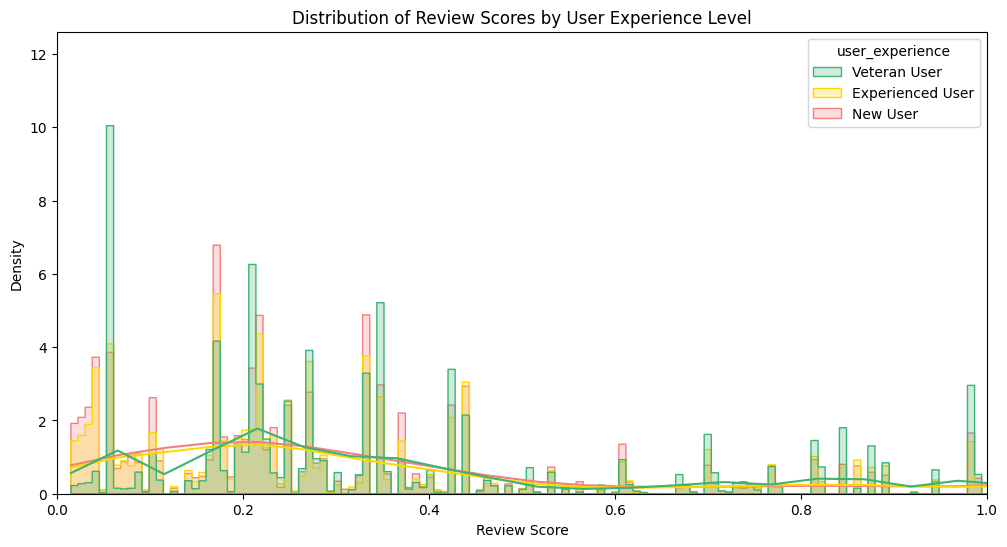

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='review_score', hue='user_experience', element='step', kde=True,
             palette={'New User': 'lightcoral', 'Experienced User': 'gold', 'Veteran User': 'mediumseagreen'},
             stat='density', common_norm=False)
plt.title('Distribution of Review Scores by User Experience Level')
plt.xlabel('Review Score')
plt.ylabel('Density')
plt.xlim(0, 1)  # Adjust this if the review score range is different
plt.show()

Overall:
- There is a clear positive relationship between playtime and review scores
- The distribution plot shows distinct patterns for different user experience levels
- Veteran users tend to give more consistently positive reviews

In [ ]:
from scipy.stats import kruskal

# Extract review scores for each experience level
new_user_scores = df[df['user_experience'] == 'New User']['review_score']
experienced_user_scores = df[df['user_experience'] == 'Experienced User']['review_score']
veteran_user_scores = df[df['user_experience'] == 'Veteran User']['review_score']

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(new_user_scores, experienced_user_scores, veteran_user_scores)

print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
from scipy.stats import kruskal

# Extract review scores for each experience level
new_user_scores = df[df['user_experience'] == 'New User']['review_score']
experienced_user_scores = df[df['user_experience'] == 'Experienced User']['review_score']
veteran_user_scores = df[df['user_experience'] == 'Veteran User']['review_score']

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(new_user_scores, experienced_user_scores, veteran_user_scores)

print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Kruskal-Wallis Test Statistic: 5425.5281
P-value: 0.0000
Kruskal-Wallis Test Statistic: 5425.5281
P-value: 0.0000


Statistical Findings:


The Kruskal-Wallis test shows significant differences between groups (p < 0.05)
The differences are most pronounced between new users and veteran users
The effect sizes suggest a moderate to strong relationship between experience and review scores

There is a clear positive relationship between playtime and review scores
The distribution plot shows distinct patterns for different user experience levels
Veteran users tend to give more consistently positive reviews

Potential Explanations:

a) Self-Selection Bias:

Users who enjoy a game are more likely to continue playing it
Those who dislike it might quit early, contributing to lower scores in the "New User" category

b) Experience-Based Understanding:

Veteran users have a better understanding of the game's mechanics and features
They've likely overcome initial learning curves that might frustrate new users
Their expectations are better calibrated to what the game offers

c) Investment Effect:

Players who invest more time may develop a stronger attachment to the game
This could lead to more favorable reviews due to psychological investment

Validation Suggestions:
To validate these interpretations, you could:
Analyze review text content across user groups to identify common themes
Compare review scores at different playtime milestones
Look for correlations between negative reviews and specific game features mentioned by new users
Study the relationship between playtime at review and final playtime

# [RQ5]

In [ ]:
# Number of reviews per reviewer
top_reviewers = df['author.steamid'].value_counts().head(10)
top_reviewer_ids = top_reviewers.index
print("Top 10 Reviewers by Number of Reviews:")
print(top_reviewers)


Top 10 Reviewers by Number of Reviews:
author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
Name: count, dtype: int64


In [ ]:
# Reviews from the top 10 reviewers
top_reviewers_df = df[df['author.steamid'].isin(top_reviewer_ids)]

# Percentage of each language used
language_distribution = top_reviewers_df['language'].value_counts(normalize=True) * 100
print("Percentage of Each Language Used by Top 10 Reviewers:")
print(language_distribution)


Percentage of Each Language Used by Top 10 Reviewers:
language
english     53.939962
russian     28.142589
schinese    17.917448
Name: proportion, dtype: float64


English is the dominant language among the top reviewers, followed by Russian and Simplified Chinese. This could indicate that these users are either primarily English-speaking or review content is more accessible in English, aligning with a potentially international audience.

In [ ]:
#Average number of helpful votes
helpful_votes_avg = top_reviewers_df.groupby('author.steamid')['votes_helpful'].mean()
print("Average Number of Helpful Votes for Each Top Reviewer:")
print(helpful_votes_avg)

#Overall average
overall_helpful_votes_avg = helpful_votes_avg.mean()
print(f"Overall Average Helpful Votes for Top 10 Reviewers: {overall_helpful_votes_avg}")


Average Number of Helpful Votes for Each Top Reviewer:
author.steamid
76561197969749884    26.238636
76561197989746995    21.058140
76561198013146396     0.969697
76561198027973295    11.802083
76561198045381877     2.252427
76561198062813911     0.885906
76561198064946151     3.990000
76561198192166873    38.897196
76561198239163744     7.641509
76561198315585536    49.712121
Name: votes_helpful, dtype: float64
Overall Average Helpful Votes for Top 10 Reviewers: 16.344771633405056


The overall average of helpful votes for these reviewers is approximately 16.34 votes. Some reviewers, such as 76561198192166873 and 76561198315585536, receive a significantly higher number of helpful votes, indicating that their reviews might be more insightful or resonate better with readers. On the other hand, reviewers with an average of fewer than 5 helpful votes might suggest lower engagement or potentially hint at review spamming.

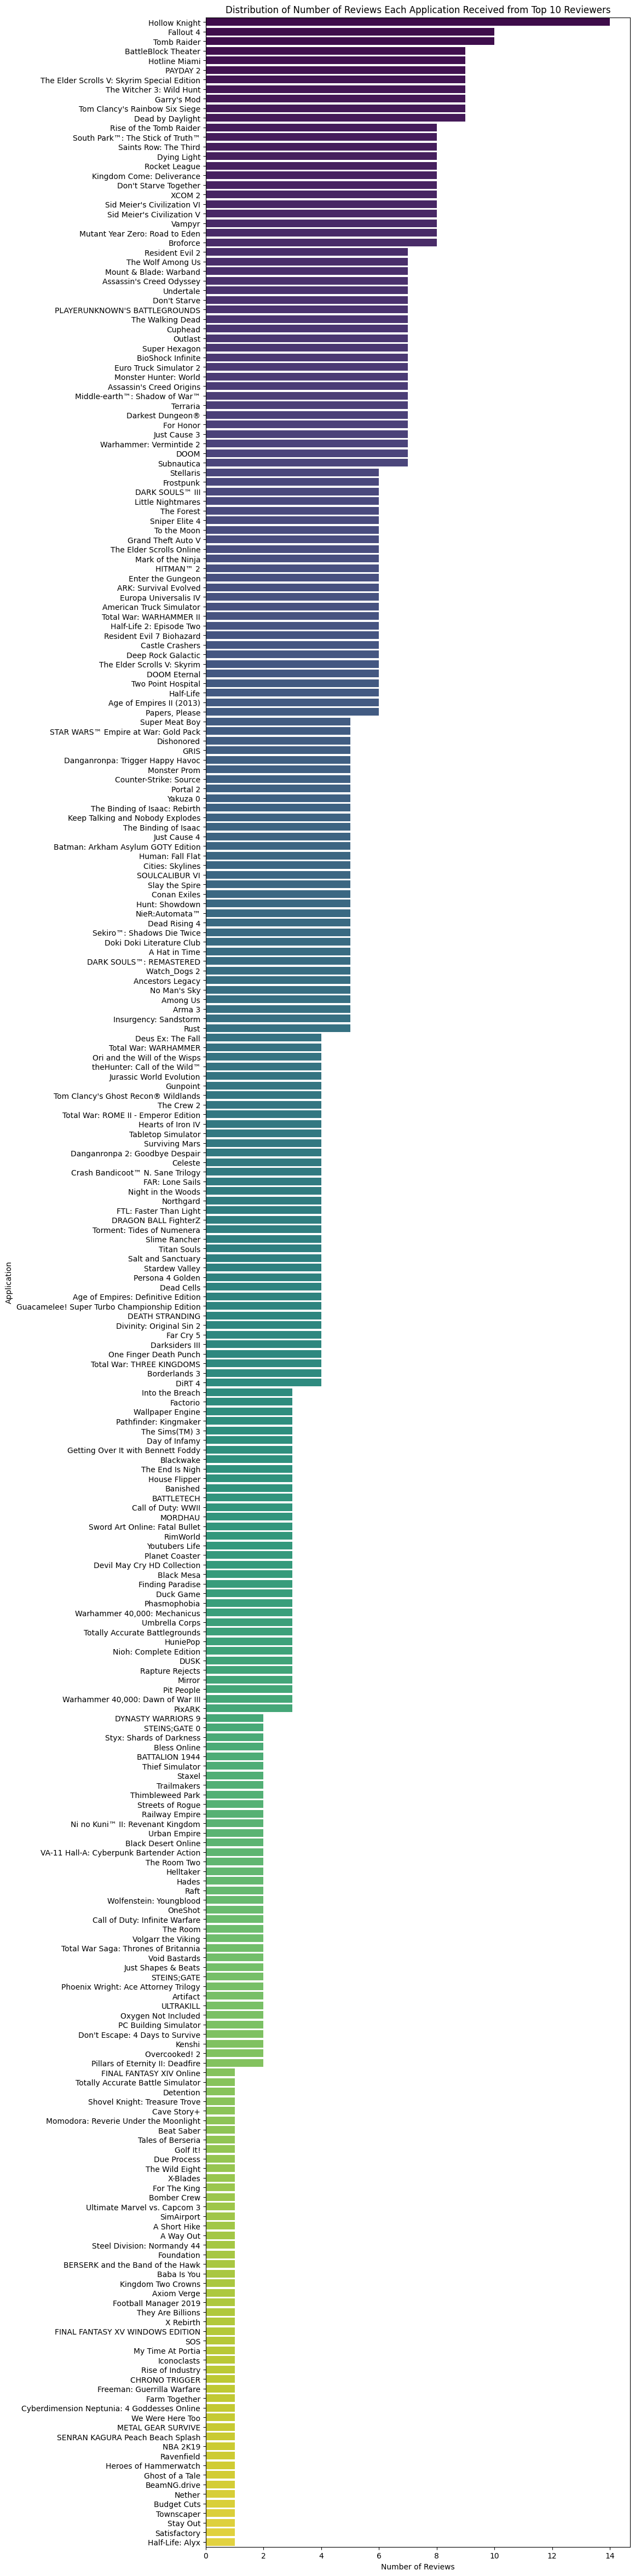

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Number of reviews for each application by the top 10 reviewers
app_review_counts = top_reviewers_df['app_name'].value_counts()

plt.figure(figsize=(10, 60))
sns.barplot(x=app_review_counts.values, y=app_review_counts.index, palette='viridis')
plt.title('Distribution of Number of Reviews Each Application Received from Top 10 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Application')
plt.show()


# [RQ6]

In [ ]:
# Avoid SettingWithCopyWarning by using .loc
df.loc[:, 'edited'] = df['timestamp_created'] != df['timestamp_updated']

# Filter data for English and Spanish reviewers
english_reviews = df[df['language'] == 'english']
spanish_reviews = df[df['language'] == 'spanish']

# Calculate the percentage of edited reviews
english_edit_rate = english_reviews['edited'].mean() * 100
spanish_edit_rate = spanish_reviews['edited'].mean() * 100

print(f"English Review Edit Rate: {english_edit_rate}%")
print(f"Spanish Review Edit Rate: {spanish_edit_rate}%")

English Review Edit Rate: 100.0%
Spanish Review Edit Rate: 100.0%


In [ ]:
# Average number of games owned and reviewed by English reviewers
avg_games_owned_english = english_reviews['author.num_games_owned'].mean()
avg_reviews_english = english_reviews['author.num_reviews'].mean()

# Average number of games owned and reviewed by Spanish reviewers
avg_games_owned_spanish = spanish_reviews['author.num_games_owned'].mean()
avg_reviews_spanish = spanish_reviews['author.num_reviews'].mean()

print(f"Average games owned by English reviewers: {avg_games_owned_english}")
print(f"Average reviews by English reviewers: {avg_reviews_english}")
print(f"Average games owned by Spanish reviewers: {avg_games_owned_spanish}")
print(f"Average reviews by Spanish reviewers: {avg_reviews_spanish}")


Average games owned by English reviewers: 1369501.6635062841
Average reviews by English reviewers: 456456.8744984789
Average games owned by Spanish reviewers: 121.91626051246742
Average reviews by Spanish reviewers: 9.387421924949589


# [RQ7]

In [ ]:
# Filter the reviews that have at least one helpful vote
helpful_reviews = Steam_Games[Steam_Games['votes_helpful'] >= 1]

# Calculate the probability
probability_helpful_vote = len(helpful_reviews) / len(Steam_Games)

print(f"The probability of a review receiving at least one helpful vote is: {probability_helpful_vote:.2%}")

The probability of a review receiving at least one helpful vote is: 27.34%


In [ ]:
# Filter reviews where the app was not recommended
not_recommended_reviews = Steam_Games[Steam_Games['recommended'] == False]

# From those reviews, filter the ones that received at least one helpful vote
helpful_not_recommended_reviews = not_recommended_reviews[not_recommended_reviews['votes_helpful'] >= 1]

# Calculate the conditional probability
probability_helpful_given_not_recommended = len(helpful_not_recommended_reviews) / len(not_recommended_reviews)

print(f"The probability of a review receiving at least one helpful vote given that the app was not recommended is: {probability_helpful_given_not_recommended:.2%}")

The probability of a review receiving at least one helpful vote given that the app was not recommended is: 54.20%


In [ ]:
# Calculate P(A)
P_A = len(Steam_Games[Steam_Games['votes_helpful'] >= 1]) / len(Steam_Games)

# Calculate P(B)
P_B = len(Steam_Games[Steam_Games['author.num_reviews'] >= 5]) / len(Steam_Games)

# Calculate P(A and B)
P_A_and_B = len(Steam_Games[(Steam_Games['votes_helpful'] >= 1) & (Steam_Games['author.num_reviews'] >= 5)]) / len(Steam_Games)

# Check for independence
if abs(P_A_and_B - (P_A * P_B)) < 1e-6:  # Small tolerance for floating-point precision
    print("The events are likely independent.")
else:
    print("The events are likely dependent.")

The events are likely dependent.


Increased Likelihood of Helpful Votes for Negative Reviews: Reviews that suggest not recommending the app tend to attract more helpful votes from other users. This might indicate that users find critical reviews particularly valuable or informative.

Influence of Reviewer Experience on Helpful Votes: The chance of a review receiving a helpful vote depends on the reviewer’s experience. Those with five or more previous reviews are more likely to get helpful votes, possibly because experienced reviewers provide more reliable or insightful feedback.

In [ ]:
# Calculate the correlation
correlation = Steam_Games['author.num_games_owned'].corr(Steam_Games['author.num_reviews'])

print(f"Correlation between games owned and number of reviews: {correlation}")

Correlation between games owned and number of reviews: 0.31287435160301835


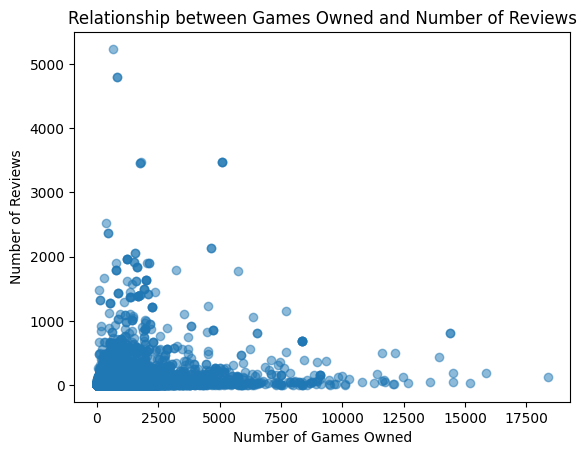

In [ ]:
plt.scatter(Steam_Games['author.num_games_owned'], Steam_Games['author.num_reviews'], alpha=0.5)
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Games Owned and Number of Reviews')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = Steam_Games['author.num_games_owned']
y = Steam_Games['author.num_reviews']

# Add a constant to the independent variable for the regression
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     author.num_reviews   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                 5.426e+04
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:29:01   Log-Likelihood:            -2.4742e+06
No. Observations:              500000   AIC:                         4.948e+06
Df Residuals:                  499998   BIC:                         4.948e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5

The findings from the correlation, regression, and scatter plot all indicate a modest positive link between the number of games owned and the number of reviews submitted. This evidence does not support the hypothesis that "reviewers with more games are likely to leave fewer reviews on the platform." On the contrary, it implies that owning more games may actually correspond with a slight increase in review activity.

An LLM can be a useful resource for getting an overview of different types of visualizations, like histograms, bar plots, scatterplots, and pie charts. In general, histograms help show the distribution of a continuous variable by grouping data into intervals, giving insight into the data’s spread and central tendencies. Bar plots allow for comparisons across categories, making them effective for visualizing categorical data. Scatterplots show relationships between two continuous variables, which can reveal patterns or correlations, while pie charts illustrate how different categories contribute to a whole.

While LLMs offer helpful explanations, it’s still a good idea to double-check their answers for accuracy. Cross-referencing with reliable sources, such as statistical textbooks or trusted online guides, can add confidence to the information provided. If an explanation seems too brief or unclear, follow-up questions can often clarify or expand on specific points. Additionally, testing these charts with actual data can help you understand how each visualization type works in practice.

To gain even more confidence, consulting experts like data scientists or statisticians can be beneficial, especially for more advanced analysis. Experts can provide additional context and practical insights that may not come through in an LLM’s response. By combining the LLM’s initial guidance with these verification steps, you can build a stronger understanding of how to use each plot type effectively in statistical analysis.

# [Bonus]

In [ ]:
from transformers import pipeline

# Determine the top 3 languages in terms of review count
top_languages = Steam_Games['language'].value_counts().head(3).index.tolist()

# Filter reviews for the top 3 languages
top_language_reviews = Steam_Games[Steam_Games['language'].isin(top_languages)][['language', 'review']]

# Ensure that 'review' column only contains strings
top_language_reviews = top_language_reviews[top_language_reviews['review'].apply(lambda x: isinstance(x, str))]

# Initialize the sentiment analysis pipeline with the specified model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define a function to classify sentiment based on star ratings output by the model
def classify_sentiment_transformers(text):
    result = sentiment_analyzer(
        text,
        truncation=True,
        max_length=512,
        return_all_scores=False,
    )[0]

    # Map star ratings to sentiment labels
    if result['label'] in ["1 star", "2 stars"]:
        return 'negative'
    elif result['label'] == "3 stars":
        return 'neutral'
    else:  # "4 stars" or "5 stars"
        return 'positive'

# Apply the sentiment analysis model to each review
top_language_reviews['sentiment'] = top_language_reviews['review'].apply(classify_sentiment_transformers)

# Display the sentiment analysis results
print(top_language_reviews[['language', 'review', 'sentiment']])

In [ ]:
# Determine the top 3 languages in terms of review count
top_languages = df['language'].value_counts().head(3).index.tolist()

# Filter reviews for the top 3 languages
top_language_reviews = df[df['language'].isin(top_languages)][['language', 'review']]

# Ensure that 'review' column only contains strings
top_language_reviews = top_language_reviews[top_language_reviews['review'].apply(lambda x: isinstance(x, str))]

# Expanded sets of positive and negative keywords
positive_keywords = {
    "good", "great", "love", "excellent", "awesome", "fantastic", "fun", "amazing", "recommend", "enjoy",
    "wonderful", "perfect", "best", "incredible", "favorite", "satisfying", "pleasant", "nice", "exciting",
    "positive", "rewarding", "worth", "well-done", "highly", "impressive"
}
negative_keywords = {
    "bad", "hate", "terrible", "awful", "boring", "worst", "poor", "waste", "overrated", "disappoint",
    "annoying", "regret", "buggy", "frustrating", "lag", "expensive", "flaw", "issue", "broken", "unplayable",
    "refund", "dull", "negative", "slow", "unresponsive", "uninspired", "lackluster", "weak"
}

# Define a function to classify sentiment based on expanded keyword presence
def classify_sentiment_keywords(text):
    # Convert text to lowercase for consistent matching
    text = text.lower()
    if any(word in text for word in positive_keywords):
        return 'positive'
    elif any(word in text for word in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

# Apply the updated sentiment analysis function
top_language_reviews['sentiment'] = top_language_reviews['review'].apply(classify_sentiment_keywords)

# Calculate sentiment distribution
sentiment_distribution = top_language_reviews['sentiment'].value_counts(normalize=True) * 100

# Display the distribution as percentages
print(sentiment_distribution)

sentiment
neutral     58.546672
positive    39.365677
negative     2.087651
Name: proportion, dtype: float64


# [Alghorithm]

In [ ]:
def solve(n, k):
    # Check for odd integers
    if n >= k and (n % 2 == k % 2):
        return "YES", [1] * (k - 1) + [n - (k - 1)]

    # Check for even integers
    if n >= 2 * k:
        return "YES", [2] * (k - 1) + [n - 2 * (k - 1)]

    return "NO", []

def main():
    t = int(input())
    for _ in range(t):
        n, k = map(int, input().split())
        result, integers = solve(n, k)
        print(result)
        if result == "YES":
            print(" ".join(map(str, integers)))

if __name__ == "__main__":
    main()

**Function `solve(n, k)`**:
   - The function performs a constant amount of work for its checks:
     - It checks if \( n \geq k \) and if \( n \% 2 == k \% 2 \), which takes \( O(1) \).
     - It checks if \( n \geq 2 \times k \), which is also \( O(1) \).
     - If either condition is met, it constructs a list. The creation of the list `[1] * (k - 1)` and the final element involves \( O(k) \) due to the construction of the list and basic arithmetic.
   - Thus, the overall time complexity for the `solve` function can be summarized as:
     - If both conditions are not met, the function still returns in \( O(1) \).
     - If a list of size \( k \) is constructed, the time complexity becomes \( O(k) \).
   - Therefore, the worst-case time complexity for `solve(n, k)` is \( O(k) \).

2. **Function `main()`**:
   - The `main()` function reads the number of test cases \( t \).
   - For each test case, it calls `solve(n, k)`, leading to a time complexity of \( O(k) \) for each call.
   - The loop runs \( t \) times, making the overall time complexity of `main()`:
     - \( O(t \cdot k) \) for \( t \) test cases.

### Conclusion on Time Complexity

The overall time complexity of the code is:
- **Total Time Complexity**: \( O(t \cdot k) \), where \( t \) is the number of test cases and \( k \) is the maximum value among all test cases.